# Nikita Kiran More( Data Science_Batch May 2024)

# Random Forest

# Task 1: Exploratory Data Analysis (EDA)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('glass 2.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [8]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

# Task 2: Data Visualization

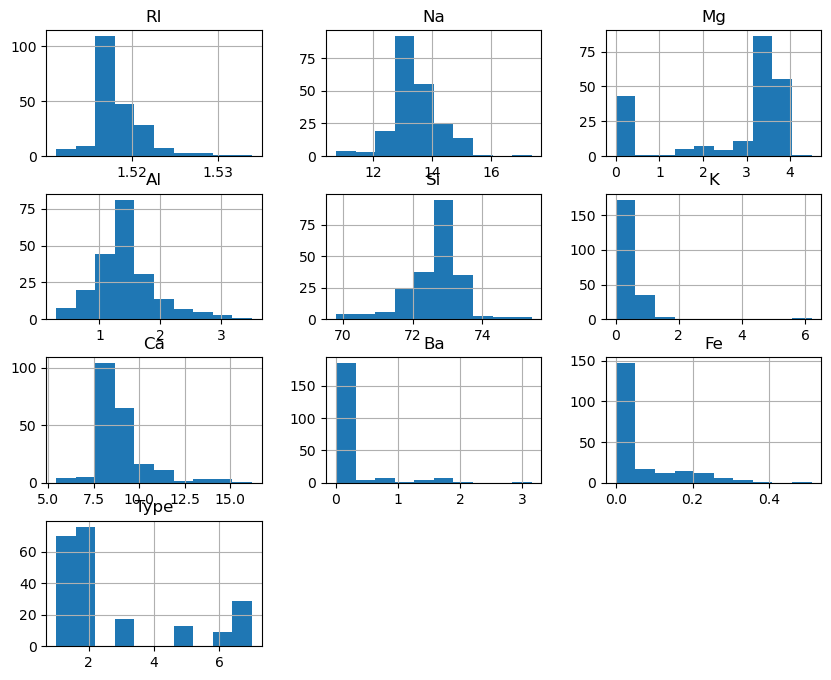

In [9]:
df.hist(figsize=(10,8))
plt.show()

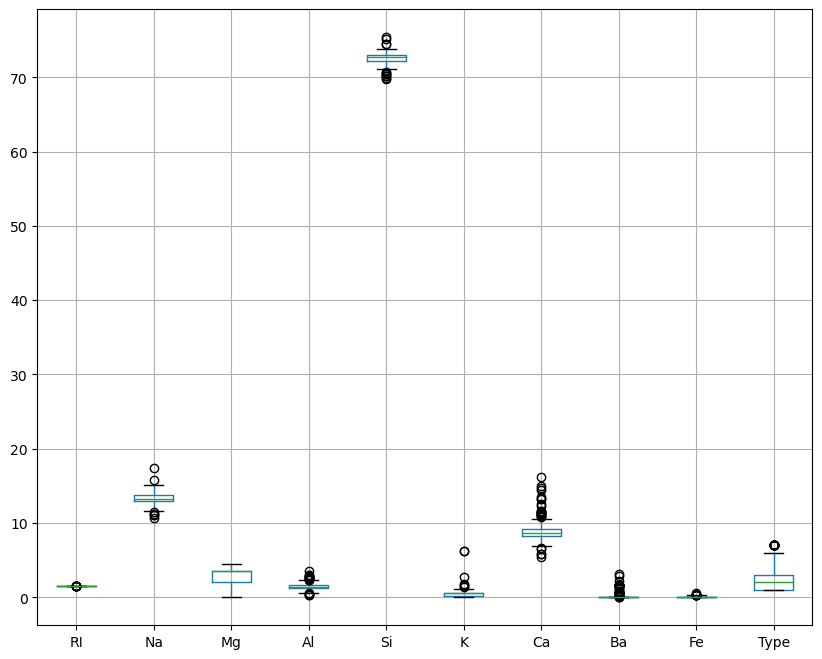

In [10]:
df.boxplot(figsize=(10, 8))
plt.show()

# Task 3: Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
glass_data_scaled = scaler.fit_transform(df)
     

In [12]:
class_weights = df['Type'].value_counts().to_dict()
class_weights = {k: v / sum(class_weights.values()) for k, v in class_weights.items()}

In [13]:
class_weights

{2.0: 0.35514018691588783,
 1.0: 0.32710280373831774,
 7.0: 0.13551401869158877,
 3.0: 0.0794392523364486,
 5.0: 0.06074766355140187,
 6.0: 0.04205607476635514}

# Task 4: Random Forest Model Implementation


In [14]:
X_train, X_test, y_train, y_test = train_test_split(glass_data_scaled, df['Type'], test_size=0.2, random_state=42)


In [15]:
X_train

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 1.10390905, -2.26815454, -0.5590784 , ..., -0.35287683,
        -0.5864509 ,  1.05756029],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.05459857, -0.96705153,  0.05244303, ..., -0.35287683,
         1.47093423, -0.37181593]])

In [16]:
X_test

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.7048151 ,  0.8986811 , -1.86551055, ...,  1.78397794,
        -0.5864509 ,  2.01047778],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [17]:
y_train

778    NaN
286    NaN
165    5.0
960    NaN
493    NaN
      ... 
106    2.0
270    NaN
860    NaN
435    NaN
102    2.0
Name: Type, Length: 799, dtype: float64

In [18]:
y_test

453    NaN
793    NaN
209    7.0
309    NaN
740    NaN
      ... 
78     2.0
29     1.0
277    NaN
261    NaN
423    NaN
Name: Type, Length: 200, dtype: float64

In [20]:
df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
994,True,True,True,True,True,True,True,True,True,True
995,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True


In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='mean')

In [35]:
X_train_imputed = imputer.fit_transform(X_train)

In [39]:
import numpy as np
print(np.isnan(X_train_imputed).sum())

0


In [40]:
rf.fit(X_train_imputed, y_train)

ValueError: Input y contains NaN.

In [42]:
print(X_train.dtype)

float64


In [43]:
y_train.isnull().sum()

622

In [44]:
X_train_clean = X_train_imputed[~y_train.isnull()]
y_train_clean = y_train.dropna()


In [45]:
rf.fit(X_train_clean, y_train_clean

RandomForestClassifier(class_weight={1.0: 0.32710280373831774,
                                     2.0: 0.35514018691588783,
                                     3.0: 0.0794392523364486,
                                     5.0: 0.06074766355140187,
                                     6.0: 0.04205607476635514,
                                     7.0: 0.13551401869158877},
                       random_state=42)

In [46]:
y_train_filled = y_train.fillna(y_train.mode()[0])

rf.fit(X_train_imputed, y_train_filled)

RandomForestClassifier(class_weight={1.0: 0.32710280373831774,
                                     2.0: 0.35514018691588783,
                                     3.0: 0.0794392523364486,
                                     5.0: 0.06074766355140187,
                                     6.0: 0.04205607476635514,
                                     7.0: 0.13551401869158877},
                       random_state=42)

In [48]:
rf.fit(X_train_imputed, y_train_filled)

RandomForestClassifier(class_weight={1.0: 0.32710280373831774,
                                     2.0: 0.35514018691588783,
                                     3.0: 0.0794392523364486,
                                     5.0: 0.06074766355140187,
                                     6.0: 0.04205607476635514,
                                     7.0: 0.13551401869158877},
                       random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [52]:
np.isnan(X_test).sum()

1630

In [53]:
print(np.isnan(X_test).sum(axis=0))

[163 163 163 163 163 163 163 163 163 163]


In [54]:
X_test_imputed = imputer.transform(X_test)

In [55]:
print(np.isnan(X_test_imputed).sum())

0


In [56]:
y_pred = rf.predict(X_test_imputed)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
print(y_test.isnull().sum())


163


In [60]:
valid_indices = ~y_test.isnull()

In [61]:
X_test_clean = X_test_imputed[valid_indices]
y_test_clean = y_test[valid_indices]

In [62]:
y_pred = rf.predict(X_test_clean)

In [63]:
print('Accuracy:', accuracy_score(y_test_clean, y_pred))
print('Precision:', precision_score(y_test_clean, y_pred, average='weighted'))
print('Recall:', recall_score(y_test_clean, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test_clean, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Task 5: Bagging and Boosting Methods

In [65]:
print(y_train.isnull().sum()) 
print(np.unique(y_train))

622
[ 1.  2.  3.  5.  6.  7. nan]


In [66]:
y_train_cleaned = y_train.dropna() 

In [67]:
from sklearn.utils.class_weight import compute_class_weight

In [70]:
classes = np.unique(y_train)

In [80]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=dict(enumerate(class_weights)))

# Additional Notes

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating):
Bagging is an ensemble method that improves the stability and accuracy of machine learning models
by reducing variance and preventing overfitting. It works by training multiple models (like decision trees) on different subsets of the data. 
These subsets are created using bootstrap sampling, which involves randomly selecting data points with replacement, meaning some points may appear
more than once, while others may be missing.

Each model is trained independently in parallel, and their predictions are combined at the end. 
For classification tasks, this combination is done through majority voting, while for regression tasks,
it’s done through averaging.

Advantages of Bagging:
- Reduces Overfitting: By averaging multiple models, Bagging reduces the risk of overfitting to noise in the training data.
- Parallel Training: Since the models are trained separately, Bagging allows parallelization, which can save time.
Random Forest is a popular example of Bagging, where multiple decision trees are trained on different data subsets and features.

Boosting:
Boosting is another ensemble method, but instead of training models independently, 
it trains them sequentially. Each model is trained to focus on correcting the errors made by the previous models.
In this process, the algorithm increases the importance of misclassified instances, forcing the next model to learn from these mistakes.
Advantages of Boosting:
- Reduces Bias: Boosting excels at reducing bias, making it effective for improving the accuracy of weak models.
- High Accuracy: Boosting often results in highly accurate models because each step improves on previous errors.
Popular examples include:
- AdaBoost, which adjusts the weights of misclassified instances.
- Gradient Boosting, which minimizes a loss function using gradient descent.
- XGBoost, a faster and more regularized version of Gradient Boosting designed for performance.
In summary, Bagging focuses on reducing variance by training models independently and aggregating their results, while Boosting focuses on reducing bias by 
sequentially improving the models performance on misclassified examples.

2. Explain how to handle imbalance in the data.

Handling imbalance in data is crucial when dealing with classification problems where one class significantly outnumbers the others. Here's how to address it:

Resampling Techniques:
-Oversampling: Increase the instances of the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples.
-Undersampling: Reduce the majority class instances to balance the dataset, though this may result in information loss.
-Class Weight Adjustment: Some machine learning models (e.g., Logistic Regression, Decision Trees) allow for adjusting class weights to penalize the majority class and make the model pay more attention to the minority class.
Anomaly Detection: If the minority class is very rare (e.g., fraud detection), treat it as an anomaly detection problem and use models designed for such tasks.
Stratified Sampling: Ensure that training, validation, and testing datasets maintain the same class distribution to avoid biased model evaluation.
Use of Balanced Metrics: Evaluate models using metrics suited for imbalanced data, such as F1-score, ROC-AUC, precision, recall, and the Matthews correlation coefficient, instead of just accuracy.
Ensemble Methods: Use ensemble techniques like bagging and boosting (e.g., Balanced Random Forest, XGBoost with class weights) to improve model performance on imbalanced datasets.
Balancing data carefully can lead to better generalization and more reliable model predictions.